In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#define the data you want to explore
local_path = 'saved_sims/pi_validator/'
scaling = 'scaled/'
txt_file = 'randomly_generated_prices_and_delays.txt'
data = pd.read_csv(local_path+scaling+txt_file, sep=" ", header=None)

In [3]:
#ingest and conform data

raw_headings = list(data.iloc[0].values)
data.drop(0, inplace=True)

n = len(raw_headings)
headings=[]
j=0
for i in range(n):
    if raw_headings[i] == '|':
        heading = ''.join(raw_headings[j:i])
        headings.append(heading)
        j=i+1

m = len(headings)

for i in range(m,n):
    data.drop(i, axis=1, inplace=True)

data.columns = headings

In [4]:
#inspect data
data

,MarketPrice(WAD),RedemptionPrice(RAY),RedemptionRate(%),PerSecondRedemptionRate(RAY),RedemptionRateTimeline(Seconds),Proportional(NoGain),Proportional(WithGain),Integral(NoGain),Integral(WithGain)
1,3527448231079752361,4200000000000000000000000000,16.131373552439914047619047,1000000004742259489737059239,31536000,160131373552439914047619047,160131373552439914047619047,0,0
2,4146263836515241330,4200313473152306474879413627,8.8497560451463745028870320,1000000002688938375247845525,31536000,12868000681982733781735282,12868000681982733781735282,1361332075850671815769189207032,75629559769481011247135038
3,3990629357290183421,4200394192221064081414486475,12.3767362739887266538750786,1000000003700112811207366049,31536000,49939321247361840518532809,49939321247361840518532809,1328904746865470957411392246761,73828041492525426020217977
4,4376846642203272353,4200537891138065690886548146,1.6399489184287146054337962,1000000000515806376662655950,31536000,-41972898622618720442964563,-41972898622618720442964563,1050702980524316103981250708724,58372387806905866497302525
5,4173804187745593808,4200572430074539307439542845,2.7217721185709120820606700,1000000000851531765262186198,31536000,6372522501289305473457539,6372522501289305473457539,375213576319560428384448107849,20845198684419815347149161
...,...,...,...,...,...,...,...,...,...
96,3508833522110625935,4238761979000588364604361231,36.1781225920482702746705305,1000000009791779847151097012,31536000,172203218889413632566135091,172203218889413632566135091,3412404126559277387291529452265,189578007031069070180570214
97,4277291086444265034,4239145544279980786474793389,17.7549555698592507963435355,1000000005182509892356134954,31536000,-8998403514537331354289755,-8998403514537331354289755,3357863265836370686351710359575,186547959213129839317725110
98,3653719760523960858,4239346149312446139549722133,31.3698821878447193196759382,1000000008651911716030978755,31536000,138140734009999272294321171,138140734009999272294321171,3160045581632094176699704124352,175558087868447920902438211
99,3581439007151287157,4240022649200368053691694148,40.7994314000084810555036366,1000000010850019699129220766,31536000,155325500955350823263157319,155325500955350823263157319,4548038634805257251640170901292,252668813044733987291879047


In [5]:
#define normalizing constants
WAD = 10**18
RAY = 10**27
RAD = 10**45

In [6]:
#convert to numerical data to floating points for viz libraries
for c in headings:
    data[c]=data[c].apply(float)


In [7]:
data

,MarketPrice(WAD),RedemptionPrice(RAY),RedemptionRate(%),PerSecondRedemptionRate(RAY),RedemptionRateTimeline(Seconds),Proportional(NoGain),Proportional(WithGain),Integral(NoGain),Integral(WithGain)
1,3.527448e+18,4.200000e+27,16.131374,1.000000e+27,31536000.0,1.601314e+26,1.601314e+26,0.000000e+00,0.000000e+00
2,4.146264e+18,4.200313e+27,8.849756,1.000000e+27,31536000.0,1.286800e+25,1.286800e+25,1.361332e+30,7.562956e+25
3,3.990629e+18,4.200394e+27,12.376736,1.000000e+27,31536000.0,4.993932e+25,4.993932e+25,1.328905e+30,7.382804e+25
4,4.376847e+18,4.200538e+27,1.639949,1.000000e+27,31536000.0,-4.197290e+25,-4.197290e+25,1.050703e+30,5.837239e+25
5,4.173804e+18,4.200572e+27,2.721772,1.000000e+27,31536000.0,6.372523e+24,6.372523e+24,3.752136e+29,2.084520e+25
...,...,...,...,...,...,...,...,...,...
96,3.508834e+18,4.238762e+27,36.178123,1.000000e+27,31536000.0,1.722032e+26,1.722032e+26,3.412404e+30,1.895780e+26
97,4.277291e+18,4.239146e+27,17.754956,1.000000e+27,31536000.0,-8.998404e+24,-8.998404e+24,3.357863e+30,1.865480e+26
98,3.653720e+18,4.239346e+27,31.369882,1.000000e+27,31536000.0,1.381407e+26,1.381407e+26,3.160046e+30,1.755581e+26
99,3.581439e+18,4.240023e+27,40.799431,1.000000e+27,31536000.0,1.553255e+26,1.553255e+26,4.548039e+30,2.526688e+26


In [8]:
#normalize data to "USD" dimension
data['MarketPrice(USD)'] = data['MarketPrice(WAD)']/WAD
data['RedemptionPrice(USD)'] = data['RedemptionPrice(RAY)']/RAY
data['time'] = data['RedemptionRateTimeline(Seconds)'].cumsum()

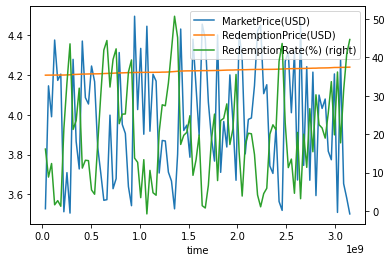

In [9]:
data.plot(x='time',y=['MarketPrice(USD)','RedemptionPrice(USD)'])
data.plot(x='time', y='RedemptionRate(%)',secondary_y=True, ax=plt.gca())

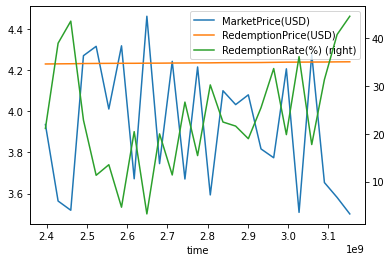

In [10]:
T=25
data.tail(T).plot(x='time',y=['MarketPrice(USD)','RedemptionPrice(USD)'])
data.tail(T).plot(x='time', y='RedemptionRate(%)',secondary_y=True, ax=plt.gca())

In [11]:
data['MarketPrice(USD)']

1      3.527448
2      4.146264
3      3.990629
4      4.376847
5      4.173804
         ...   
96     3.508834
97     4.277291
98     3.653720
99     3.581439
100    3.501323
Name: MarketPrice(USD), Length: 100, dtype: float64

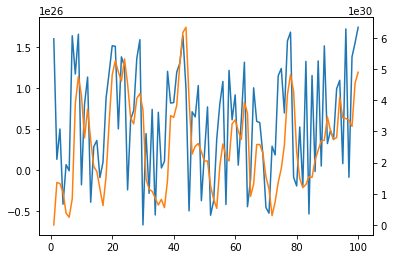

In [12]:
plt.figure()
data['Proportional(NoGain)'].plot()
data['Integral(NoGain)'].plot(secondary_y=True,  ax=plt.gca())

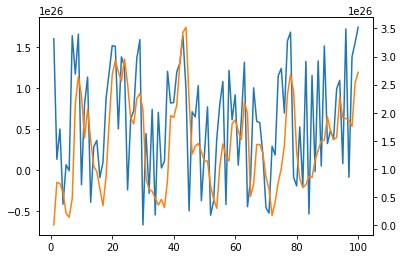

In [13]:
plt.figure()
data['Proportional(WithGain)'].plot()
data['Integral(WithGain)'].plot(secondary_y=True,  ax=plt.gca())